In [1]:
# Exploring Errors from IRAF


In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from  glob import glob
import os

In [3]:
os.chdir('/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1')
ms_files = glob("Intermediate_steps/CRI*_1.nod.ms.fits")


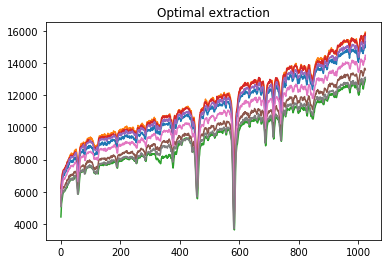

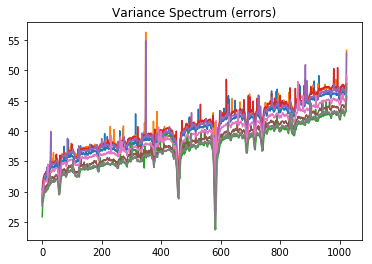

In [4]:
for f in ms_files:
    data = fits.getdata(f)
    #print(data.shape)
    
    plt.plot(data[0,0,:])
plt.title("Optimal extraction")
plt.show()

for f in ms_files:
    data = fits.getdata(f)
    #print(data.shape)

    plt.plot(data[2,0,:])
plt.title("Variance Spectrum (errors)")
plt.show()

In [5]:
norm_files = glob("Intermediate_steps/CRI*_1.nod.ms.norm.fits")

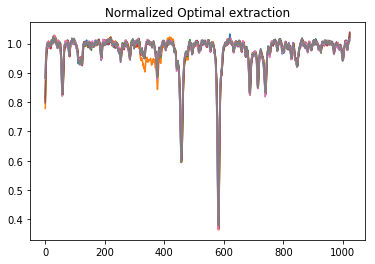

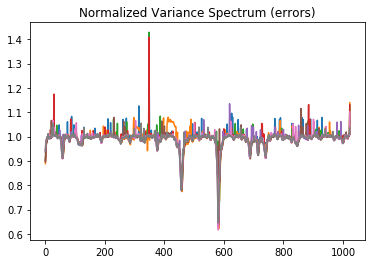

In [6]:
for f in norm_files:
    data = fits.getdata(f)
    
    plt.plot(data[0, 0, :])
plt.title("Normalized Optimal extraction")
plt.show()

for f in norm_files:
    data = fits.getdata(f)

    plt.plot(data[2, 0, :])
plt.title("Normalized Variance Spectrum (errors)")
plt.show()

# Checking Solene files

In [7]:
order = 48
obsname = "CAL-OB1"
obsname = "OB1"

In [8]:

path = f"/home/jneal/Phd/Collaborations/eta_tel_Hagelberg/data/good_reductions/order{order}/{obsname}/"
os.chdir(path)
chip = 2
ms_files = sorted(glob( "C*_{0}.*ms.fits.*".format(chip)))
norm_files = sorted(glob( "C*_{0}.*ms.norm.fits.*".format(chip)))
norm_sum_files = sorted(glob( "C*_{0}.*ms.norm.sum.fits.*".format(chip)))


In [9]:
print(ms_files)
print(len(ms_files))

['CRIRE.2009-08-04T02:23:48.256_2.nod.ms.fits.gz', 'CRIRE.2009-08-04T02:29:39.231_2.nod.ms.fits.gz', 'CRIRE.2009-08-04T02:35:20.128_2.nod.ms.fits.gz', 'CRIRE.2009-08-04T02:41:12.934_2.nod.ms.fits.gz', 'CRIRE.2009-08-04T02:46:53.833_2.nod.ms.fits.gz', 'CRIRE.2009-08-04T02:52:47.555_2.nod.ms.fits.gz', 'CRIRE.2009-08-04T02:58:28.451_2.nod.ms.fits.gz', 'CRIRE.2009-08-04T03:04:22.174_2.nod.ms.fits.gz']
8


In [10]:
print(norm_files)
print(len(norm_files))

['CRIRE.2009-08-04T02:23:48.256_2.nod.ms.norm.fits.gz', 'CRIRE.2009-08-04T02:29:39.231_2.nod.ms.norm.fits.gz', 'CRIRE.2009-08-04T02:35:20.128_2.nod.ms.norm.fits.gz', 'CRIRE.2009-08-04T02:41:12.934_2.nod.ms.norm.fits.gz', 'CRIRE.2009-08-04T02:46:53.833_2.nod.ms.norm.fits.gz', 'CRIRE.2009-08-04T02:52:47.555_2.nod.ms.norm.fits.gz', 'CRIRE.2009-08-04T02:58:28.451_2.nod.ms.norm.fits.gz', 'CRIRE.2009-08-04T03:04:22.174_2.nod.ms.norm.fits.gz']
8


In [11]:
print(norm_sum_files)
print(len(norm_sum_files))

['CRIRE.2009-08-04T02:23:48.256_2.nod.ms.norm.sum.fits.gz']
1


/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


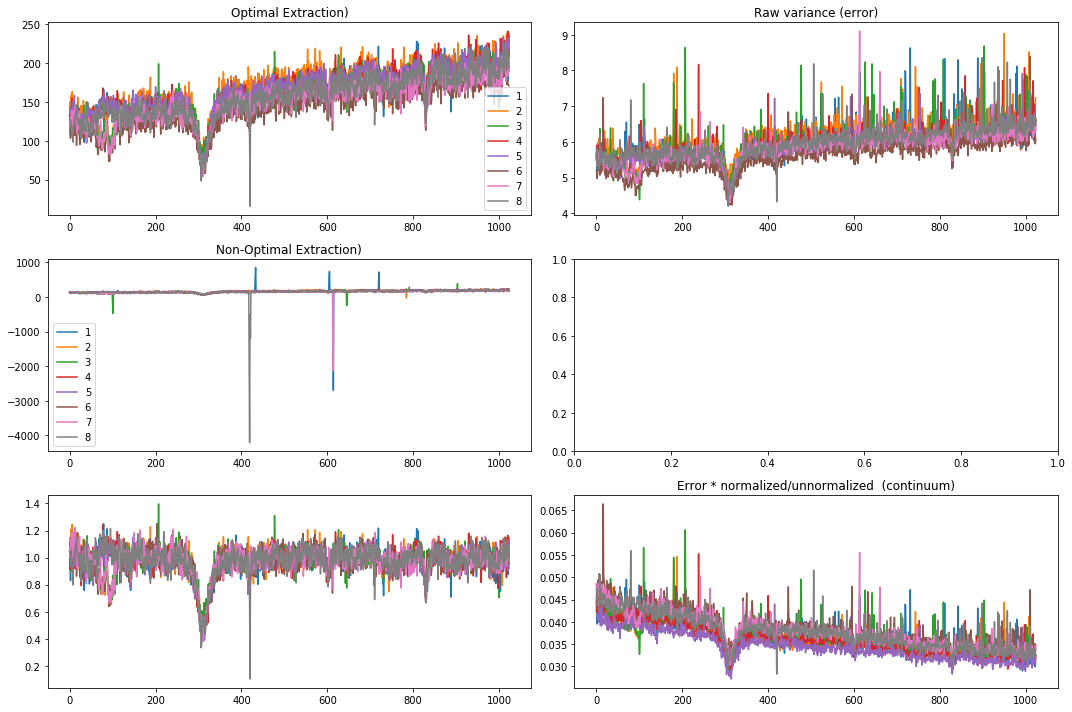

In [12]:
# Divide each non-normalized error by the normalization factor in between optimal spectra.
plt.figure(figsize=(15, 10))
for ii, (mf, nf) in enumerate(zip(ms_files, norm_files)):
    #if len(ms_files) == 8 and ii != 0:
        msdata = fits.getdata(mf) 
        assert msdata.shape == (3,1,1024)
        normdata = fits.getdata(nf)
        assert normdata.shape == (3,1,1024)

        ms_opt = msdata[0, 0, :].squeeze()
        norm_opt = normdata[0, 0, :].squeeze()

        ms_nonopt = msdata[1, 0, :].squeeze()
        norm_nonopt = normdata[1, 0, :].squeeze()

        continuum = ms_opt / norm_opt

        ms_err = msdata[2, 0, :].squeeze()
        norm_err = normdata[2, 0, :].squeeze()

        # mserr_continuum = ms_err / continuum

        plt.subplot(321)
        plt.plot(ms_opt, label=ii+1)

        plt.subplot(323)
        plt.plot(ms_nonopt, label=ii+1)

        plt.subplot(325)
        plt.plot(norm_opt, label=ii+1)

        plt.subplot(322)
        plt.plot(ms_err)

        # plt.subplot(324)
        # plt.plot(norm_err / ms_opt, label=ii+1)

        plt.subplot(326)
        plt.plot(norm_err * norm_opt / ms_opt)

plt.subplot(321)
plt.title("Optimal Extraction)")
plt.legend()

plt.subplot(323)
plt.title("Non-Optimal Extraction)")
plt.legend()

plt.subplot(322)
plt.title("Raw variance (error)")

plt.subplot(324)
#plt.title("Solene's divide by unnormalized")
#plt.legend()

plt.subplot(326)
plt.title("Error * normalized/unnormalized  (continuum)")
plt.tight_layout()
plt.show()


For solene's data the errors in *norm.fits are not normalized.

Also the non-optimal is not normalized either.


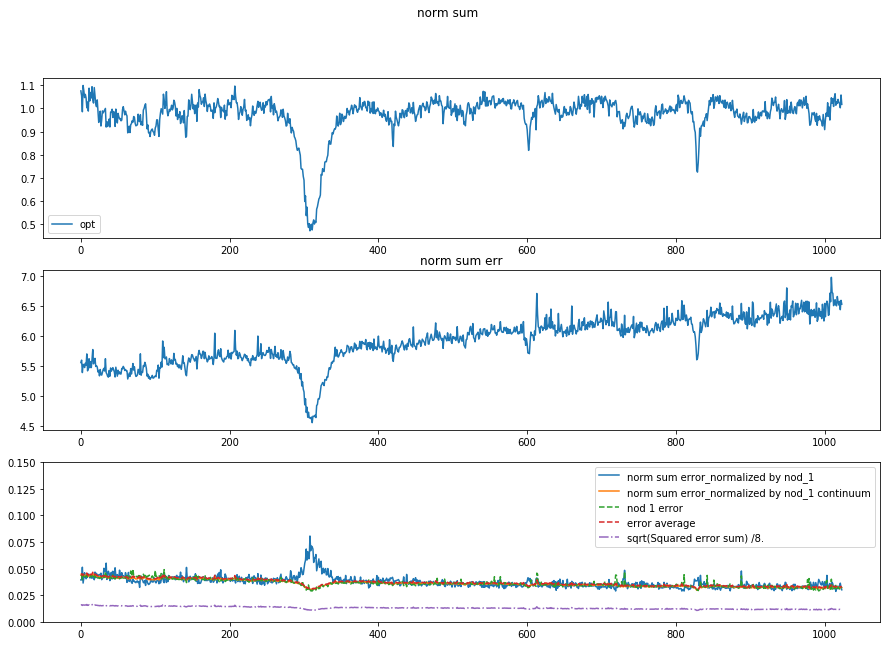

0.013007256176348396

In [13]:
import numpy as np
# Divide each non-normalized error by the normalization factor in between optimal spectra.
plt.figure(figsize=(15, 10))
nod1_error = np.zeros(1024)
nod1_opt = np.zeros(1024)
nod1_norm = np.zeros(1024)
error_sum = np.zeros(1024)
square_error = np.zeros(1024)

for ii, (mf, nf) in enumerate(zip(ms_files, norm_files)):

        msdata = fits.getdata(mf) 
        assert msdata.shape == (3,1,1024)
        normdata = fits.getdata(nf)
        assert normdata.shape == (3,1,1024)

        ms_opt = msdata[0, 0, :].squeeze()
        norm_opt = normdata[0, 0, :].squeeze()

        ms_error = msdata[2, 0, :].squeeze()

        norm_error = ms_error * norm_opt / ms_opt

        if ii == 0:
            nod1_error += norm_error
            nod1_opt += ms_opt
            nod1_norm += norm_opt

        error_sum += norm_error
        square_error += (norm_error * norm_error)


# Norm_sum
norm_sumdata = fits.getdata(norm_sum_files[0])
norm_sum_opt = norm_sumdata[0, 0, :].squeeze()
# norm_sum_nonopt = norm_sumdata[1, 0, :].squeeze()
norm_sum_err = norm_sumdata[2, 0, :].squeeze()
plt.subplot(311)
plt.plot(norm_sum_opt, label="opt")

# plt.plot(norm_sum_nonopt, label="non opt")
plt.legend()
plt.subplot(312)
plt.title("norm sum err")
plt.plot(norm_sum_err, label="norm sum error")
plt.subplot(313)
plt.plot(norm_sum_err / nod1_opt, label="norm sum error_normalized by nod_1")
plt.plot(norm_sum_err * nod1_norm / nod1_opt, label="norm sum error_normalized by nod_1 continuum")
plt.plot(nod1_error, "--", label="nod 1 error")
plt.plot(error_sum / 8, "--", label="error average")
plt.plot(np.sqrt(square_error)/8, "-.", label="sqrt(Squared error sum) /8.")
plt.legend()
plt.ylim([0, 0.15])
plt.suptitle("norm sum")
plt.show()
np.mean(np.sqrt(square_error)/8)

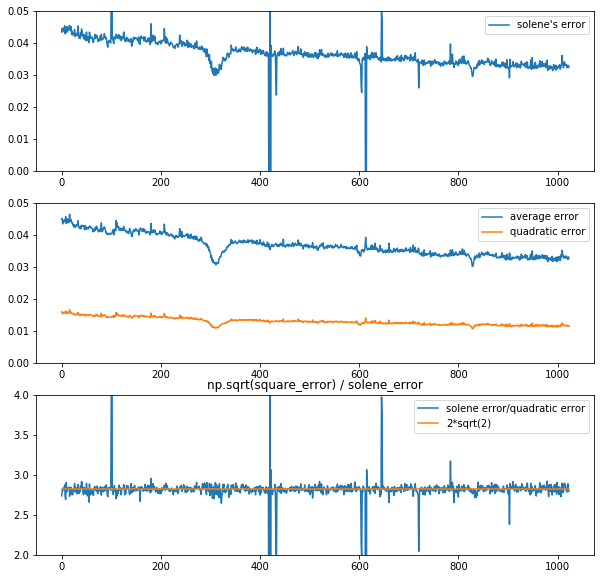

In [42]:
# Solenes_error
norm_sumdata = fits.getdata(norm_sum_files[0])
norm_sum_opt = norm_sumdata[0, 0, :].squeeze()
norm_sum_nonopt = norm_sumdata[1, 0, :].squeeze()
norm_sum_err = norm_sumdata[2, 0, :].squeeze()

solene_error = norm_sum_err * norm_sum_opt / norm_sum_nonopt
plt.figure(figsize=(10,10))
ax = plt.subplot(311)
plt.plot(solene_error, label="solene's error")
plt.legend()

plt.subplot(312, sharey=ax)
plt.plot(error_sum / 8, label="average error")
plt.plot(np.sqrt(square_error) / 8, label="quadratic error")
plt.ylim([0, 0.05])
plt.legend()

plt.subplot(313)
plt.title("np.sqrt(square_error) / solene_error")
plt.plot(solene_error/(np.sqrt(square_error)/8), label="solene error/quadratic error")
plt.plot(np.arange(1024), np.ones(1024)*np.sqrt(8), alpha=1, label="2*sqrt(2)")
plt.ylim([2, 4])
plt.legend()


/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


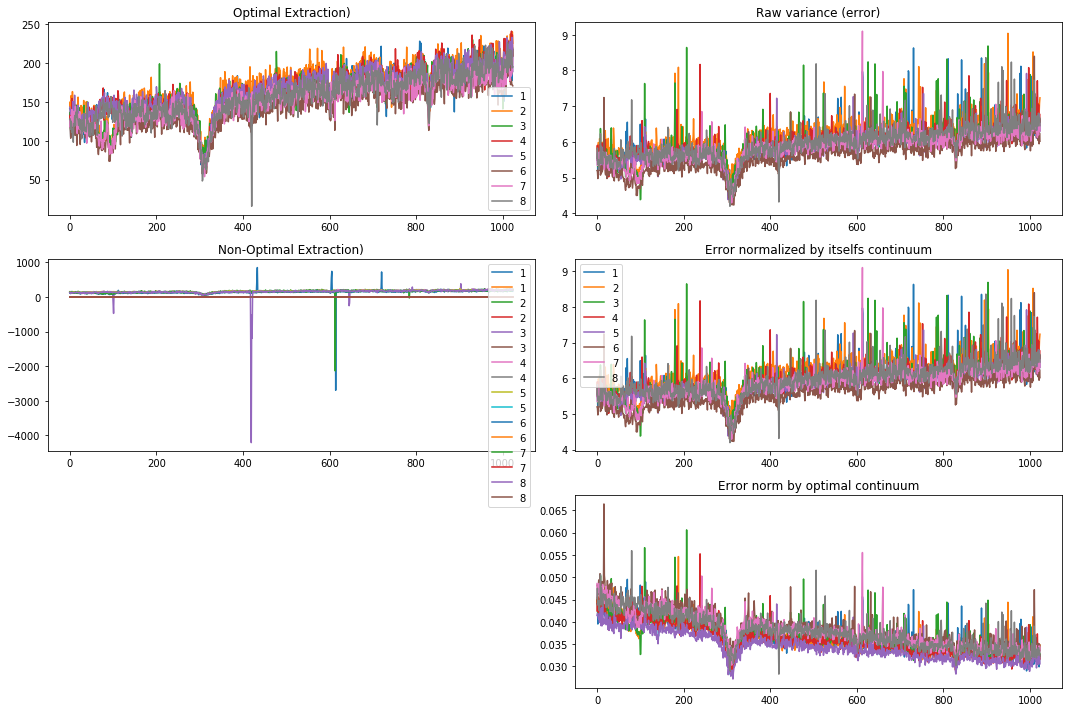

In [15]:
# Divide each non-normalized error by the normalization factor in between optimal spectra.
plt.figure(figsize=(15, 10))
for ii, (mf, nf) in enumerate(zip(ms_files, norm_files)):
    
    msdata = fits.getdata(mf) 
    assert msdata.shape == (3,1,1024)
    normdata = fits.getdata(nf)
    assert normdata.shape == (3,1,1024)
    
    ms_opt = msdata[0, 0, :].squeeze()
    norm_opt = normdata[0, 0, :].squeeze()
    
    ms_nonopt = msdata[1, 0, :].squeeze()
    norm_nonopt = normdata[1, 0, :].squeeze()
    
    continuum = ms_opt / norm_opt
    
    ms_err = msdata[2, 0, :].squeeze()
    norm_err = normdata[2, 0, :].squeeze()
    
    mserr_continuum = ms_err / continuum
    
    plt.subplot(321)
    plt.plot(ms_opt, label=ii+1)
    
    plt.subplot(323)
    plt.plot(ms_nonopt, label=ii+1)
    
    plt.subplot(323)
    plt.plot(norm_opt, label=ii+1)
    
    plt.subplot(322)
    plt.plot(ms_err)
    
    plt.subplot(324)
    plt.plot(norm_err, label=ii+1)
    
    plt.subplot(326)
    plt.plot(mserr_continuum)

plt.subplot(321)
plt.title("Optimal Extraction)")
plt.legend()

plt.subplot(323)
plt.title("Non-Optimal Extraction)")
plt.legend()

plt.subplot(322)
plt.title("Raw variance (error)")

plt.subplot(324)
plt.title("Error normalized by itselfs continuum")
plt.legend()

plt.subplot(326)
plt.title("Error norm by optimal continuum")
plt.tight_layout()
plt.show()
